# <span style="color:#2E86C1;">Sujet 5 — Convergences et représentations graphiques</span>

## <span style="color:#1F618D;">Introduction</span>

Ce projet vise à illustrer graphiquement différents phénomènes de convergence des lois de probabilité :
- la convergence d’une loi **binomiale** vers une loi **de Poisson**,  
- la convergence d’une loi **de Poisson** vers une loi **normale**,  
- et le **théorème de la limite centrée** (ou TCL).

Ces expérimentations permettront d’observer comment des distributions discrètes ou continues tendent à se rapprocher
d’un comportement normal lorsque leurs paramètres ou leur taille d’échantillon augmentent.

---

## <span style="color:#1F618D;">Sommaire</span>

1. [Imports nécessaires](#imports-nécessaires)  
2. [Lois de Poisson](#lois-de-poisson)  
3. [Lois binomiales](#lois-binomiales)  
4. [Lois normales](#lois-normales)  
5. [Convergence Binomiale → Poisson](#convergence-binomiale--poisson)  
6. [Convergence Poisson → Normale](#convergence-poisson--normale)  
7. [Théorème de la limite centrée](#théorème-de-la-limite-centrée)  
8. [Conclusion](#conclusion)

## <span id="imports-nécessaires" style="color:#1B4F72;">Imports nécessaires</span>

Importer les bibliothèques nécessaires :
- **numpy** pour les calculs numériques,  
- **matplotlib.pyplot** pour les graphiques,  
- **scipy.stats** pour accéder aux lois de probabilité (poisson, binom, norm).

Ces outils serviront à générer et comparer visuellement les distributions étudiées.

---

### Installation avec pip

Si les bibliothèques ne sont pas encore installées, exécuter les commandes suivantes dans une cellule ou un terminal :

```bash
pip install numpy matplotlib scipy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm, uniform, expon, bernoulli

## <span id="lois-de-poisson" style="color:#2471A3;">1) Lois de Poisson</span>

Objectif : représenter plusieurs lois de Poisson sur un même graphique pour différentes valeurs de λ.

Écrire une fonction `graphiques_poisson(kmax=100, *args)` qui :
- prend *k* de 0 à kmax (par défaut 100),
- affiche P(X = k) en fonction de *k*,
- superpose plusieurs courbes correspondant à différents λ.


In [6]:
%matplotlib inline

In [7]:
def graphiques_poisson(kmax=100, *args):
    """
    Retourne la représentation graphique en histogramme des lois de Poisson
    pour k variant entre 0 et kmax (100 par défaut) et de paramètres donnés
    en arguments (*args).

    Exemple :
        graphiques_poisson(40, 2, 5, 10)
    """

    # Vérification : au moins un paramètre λ doit être fourni
    if not args:
        raise ValueError("Veuillez fournir au moins une valeur de λ (ex: graphiques_poisson(40, 2, 5)).")

    # Axe des k
    k = np.arange(0, kmax + 1)

    # Création de la figure
    plt.figure(figsize=(9, 5))

    # Tracé de chaque loi de Poisson
    for parametre in args:
        y = poisson.pmf(k, parametre)
        plt.bar(k, y, alpha=0.6, label=f"λ = {parametre}")

    # Mise en forme du graphique
    plt.title("Lois de Poisson pour différentes valeurs de λ", fontsize=14, fontweight="bold")
    plt.xlabel("k", fontsize=12)
    plt.ylabel("P(X = k)", fontsize=12)
    plt.legend(title="Paramètres λ", loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)

    # Affichage explicite
    plt.tight_layout()
    plt.show()

In [ ]:
graphiques_poisson(40, 1, 3, 6, 10)

## <span id="lois-binomiales" style="color:#2471A3;">2) Lois binomiales</span>

Objectif : comparer la forme de la loi binomiale pour divers couples *(n, p)*.

Créer une fonction `graphiques_binomiale(n=50, p=0.1, kmax=100, *args)` :
- Par défaut : n=50, p=0.1.
- Possibilité de tracer plusieurs distributions pour des couples *(n, p)* différents.
- Comparer les formes obtenues en faisant varier p.


In [9]:
def graphiques_binomiale(n=50, p=0.1, kmax=100, *args):
    """
    Retourne la représentation graphique en histogramme des lois binomiales
    pour k variant entre 0 et kmax (100 par défaut) et pour les paramètres donnés.

    Exemple :
        graphiques_binomiale(50, 0.1)
        graphiques_binomiale(50, 0.1, 100, (30, 0.3), (80, 0.05))
    """

    # Si aucun argument supplémentaire, on trace juste (n, p)
    params = [(n, p)] if not args else [(n, p)] + list(args)

    # Axe des k
    k = np.arange(0, kmax + 1)

    # Création de la figure
    plt.figure(figsize=(9, 5))

    # Tracé pour chaque couple (n, p)
    for (nn, pp) in params:
        y = binom.pmf(k, nn, pp)
        plt.bar(k, y, alpha=0.6, label=f"n={nn}, p={pp}")

    # Mise en forme du graphique
    plt.title("Lois Binomiales pour différentes valeurs de n et p", fontsize=14, fontweight="bold")
    plt.xlabel("k", fontsize=12)
    plt.ylabel("P(X = k)", fontsize=12)
    plt.legend(title="Paramètres (n, p)", loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)

    # Affichage explicite
    plt.tight_layout()
    plt.show()

In [ ]:
graphiques_binomiale(50, 0.1)

## <span id="lois-normales" style="color:#2471A3;">3) Lois normales</span>

Objectif : afficher la densité de plusieurs lois normales sur le même graphique.

Créer une fonction `graphiques_normale(mu=0, sigma=1, *args)` :
- Par défaut : N(0,1).
- Tracer les densités pour différents couples *(μ, σ)*.
- Comparer la dispersion et la position des distributions.


In [11]:
def graphiques_normale(mu=0, sigma=1, *args):
    """
    Affiche sur un même graphique les densités de lois normales
    pour différents couples (mu, sigma).

    Paramètres :
    - mu, sigma : premiers paramètres (par défaut N(0,1))
    - *args : paramètres supplémentaires sous forme de tuples (mu, sigma)

    Exemple :
        graphiques_normale(0, 1, (0, 2), (2, 1))
    """
    # Liste des couples (mu, sigma)
    params = [(mu, sigma)] if not args else [(mu, sigma)] + list(args)

    # Sécurisation : sigma > 0
    for m, s in params:
        if s <= 0:
            raise ValueError(f"σ doit être > 0, reçu σ={s}.")

    # Détermination d'un intervalle commun [xmin, xmax]
    xmin = min(m - 4 * s for (m, s) in params)
    xmax = max(m + 4 * s for (m, s) in params)

    x = np.linspace(xmin, xmax, 1000)

    plt.figure(figsize=(8, 5))
    for (m, s) in params:
        y = norm.pdf(x, loc=m, scale=s)
        plt.plot(x, y, label=f"μ={m}, σ={s}")

    plt.title("Densités de lois normales pour différents (μ, σ)", fontsize=14, fontweight="bold")
    plt.xlabel("x", fontsize=12)
    plt.ylabel("f(x)", fontsize=12)
    plt.legend(title="Paramètres", loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


In [ ]:
graphiques_normale(0, 1, (0, 2), (2, 1))

## <span id="convergence-binomiale--poisson" style="color:#1A5276;">4) Convergence Binomiale → Poisson</span>

Objectif : illustrer la convergence d’une loi binomiale vers une loi de Poisson.

Sur un même graphique :
- tracer la loi **de Poisson(λ)**,  
- tracer la loi **Binomiale(n, p)**.

Ajuster *n* et *p* pour que *Binomiale(n, p)* ≈ *Poisson(λ)*.  
La condition générale est :  
> n → ∞, p → 0, avec λ = n·p fixé.

In [14]:
def comparaison_binomiale_poisson(lam=5, n=100, p=None, kmax=None):
    """
    Compare graphiquement la loi de Poisson(λ) et la loi Binomiale(n, p)
    sur un même graphique.

    - Si p n'est pas fourni, on prend p = λ / n (classique : λ = n·p).
    - kmax : valeur maximale de k à tracer (par défaut autour de λ).

    Exemple :
        comparaison_binomiale_poisson(lam=5, n=100)
    """
    # Choix de p si non fourni
    if p is None:
        p = lam / n

    if not (0 < p < 1):
        raise ValueError(f"p doit être dans ]0,1[, reçu p={p}")

    # Choix de kmax
    if kmax is None:
        # Intervalle raisonnable autour de λ
        kmax = min(n, int(lam + 4 * np.sqrt(lam)))

    k = np.arange(0, kmax + 1)

    # Lois
    poi_vals = poisson.pmf(k, lam)
    bino_vals = binom.pmf(k, n, p)

    plt.figure(figsize=(8, 5))

    # Décalage léger pour distinguer les barres
    plt.bar(k - 0.2, poi_vals, width=0.4, alpha=0.6, label=f"Poisson(λ={lam})")
    plt.bar(k + 0.2, bino_vals, width=0.4, alpha=0.6, label=f"Binomiale(n={n}, p={p:.3f})")

    plt.title("Convergence Binomiale → Poisson (λ = n·p)", fontsize=14, fontweight="bold")
    plt.xlabel("k", fontsize=12)
    plt.ylabel("P(X = k)", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


In [ ]:
comparaison_binomiale_poisson(lam=5, n=500)


## <span id="convergence-poisson--normale" style="color:#1A5276;">5) Convergence Poisson → Normale</span>

Objectif : montrer que pour λ grand, la loi de Poisson se rapproche d’une loi normale.

Tracer :
- Poisson(λ),
- Normale(μ = λ, σ = √λ).

Observer la convergence visuelle pour λ croissant.  
Condition :  
> λ grand ⇒ Poisson(λ) ≈ N(λ, λ).


In [21]:
def comparaison_poisson_normale(lam=10, kmax=None):
    """
    Compare graphiquement la loi de Poisson(λ) et la loi Normale(μ=λ, σ=√λ)
    sur un même graphique.

    Exemple :
        comparaison_poisson_normale(lam=10)
        comparaison_poisson_normale(lam=30)
    """
    if lam <= 0:
        raise ValueError("λ doit être > 0.")

    # Choix de kmax
    if kmax is None:
        kmax = int(lam + 4 * np.sqrt(lam))

    k = np.arange(0, kmax + 1)

    # Poisson
    poi_vals = poisson.pmf(k, lam)

    # Normale approchante
    mu = lam
    sigma = np.sqrt(lam)
    x = np.linspace(0, kmax, 1000)
    norm_vals = norm.pdf(x, loc=mu, scale=sigma)

    plt.figure(figsize=(8, 5))

    # Poisson en barres
    plt.bar(k, poi_vals, width=0.9, alpha=0.6, label=f"Poisson(λ={lam})")

    # Normale en courbe
    plt.plot(x, norm_vals, linewidth=2, label=f"Normale(μ={mu}, σ={sigma:.2f})")

    plt.title("Convergence Poisson(λ) → Normale(μ=λ, σ=√λ)", fontsize=14, fontweight="bold")
    plt.xlabel("k / x", fontsize=12)
    plt.ylabel("Probabilité / densité", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


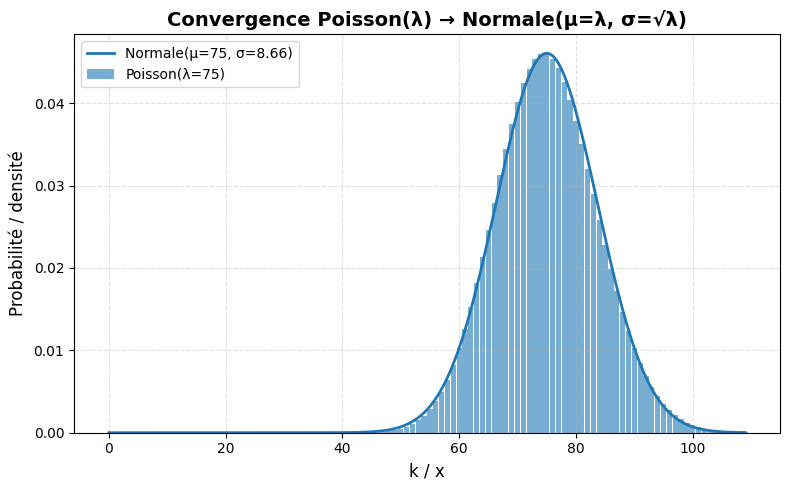

In [28]:
comparaison_poisson_normale(lam=75)


## <span id="théorème-de-la-limite-centrée" style="color:#154360;">6) Théorème de la limite centrée</span>

Soit (Xₙ) une suite de variables aléatoires indépendantes et identiquement distribuées,
ayant la même espérance *m* et le même écart-type *σ*.

On définit :
\[
Sₙ = X₁ + X₂ + ... + Xₙ, \quad Sₙ^* = \frac{Sₙ - n·m}{σ·√n}
\]

Le théorème indique que Sₙ* converge en loi vers la loi normale centrée réduite N(0,1).

**Illustration graphique :**
- Simuler des sommes Sₙ pour différentes tailles d’échantillon *n*.  
- Tracer l’histogramme normalisé des Sₙ*.  
- Superposer la densité de N(0,1).  
- Montrer la convergence à mesure que *n* augmente.

Tester avec plusieurs distributions de départ : uniforme, Bernoulli, exponentielle, etc.


In [30]:
def tcl_illustration(distribution="bernoulli", n_list=(1, 2, 5, 10, 30, 50), Nsim=10000):
    """
    Illustre le théorème de la limite centrée :
    on trace l'histogramme de S_n* pour différents n, superposé à la densité N(0,1).

    Paramètres :
    - distribution : "bernoulli", "uniforme", "exponentielle"
    - n_list : liste des tailles d'échantillon n à tester
    - Nsim : nombre de simulations pour chaque n
    """
    n_list = list(n_list)
    nb_n = len(n_list)

    # Choix de la loi de base, avec son espérance m et son écart-type sigma
    if distribution == "bernoulli":
        # Bernoulli(p=0.5)
        p = 0.5
        m = p
        sigma = np.sqrt(p * (1 - p))

        def generate_X(size):
            return bernoulli.rvs(p, size=size)

    elif distribution == "uniforme":
        # Uniforme(0,1)
        m = 0.5
        sigma = np.sqrt(1 / 12)

        def generate_X(size):
            return uniform.rvs(loc=0, scale=1, size=size)

    elif distribution == "exponentielle":
        # Exponentielle de paramètre 1 (moyenne 1)
        m = 1.0
        sigma = 1.0

        def generate_X(size):
            return expon.rvs(scale=1.0, size=size)

    else:
        raise ValueError("Distribution non reconnue. Utiliser 'bernoulli', 'uniforme' ou 'exponentielle'.")

    # Préparation des sous-graphiques
    cols = min(3, nb_n)
    rows = int(np.ceil(nb_n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3.5 * rows), squeeze=False)

    x_ref = np.linspace(-4, 4, 1000)
    densite_normale = norm.pdf(x_ref, loc=0, scale=1)

    for idx, n in enumerate(n_list):
        row = idx // cols
        col = idx % cols
        ax = axes[row][col]

        # Génération des X et sommes S_n
        X = generate_X((Nsim, n))    # matrice Nsim x n
        S_n = X.sum(axis=1)

        # Variable centrée réduite S_n*
        S_n_star = (S_n - n * m) / (sigma * np.sqrt(n))

        # Histogramme normalisé
        ax.hist(S_n_star, bins=30, density=True, alpha=0.6, edgecolor="black", linewidth=0.5)

        # Densité de N(0,1)
        ax.plot(x_ref, densite_normale, linewidth=2)

        ax.set_title(f"{distribution}, n = {n}")
        ax.set_xlim(-4, 4)

    # Masquer les axes inutilisés si nb_n < rows*cols
    for idx in range(nb_n, rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row][col].axis("off")

    fig.suptitle("Théorème de la limite centrée : convergence vers N(0,1)", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


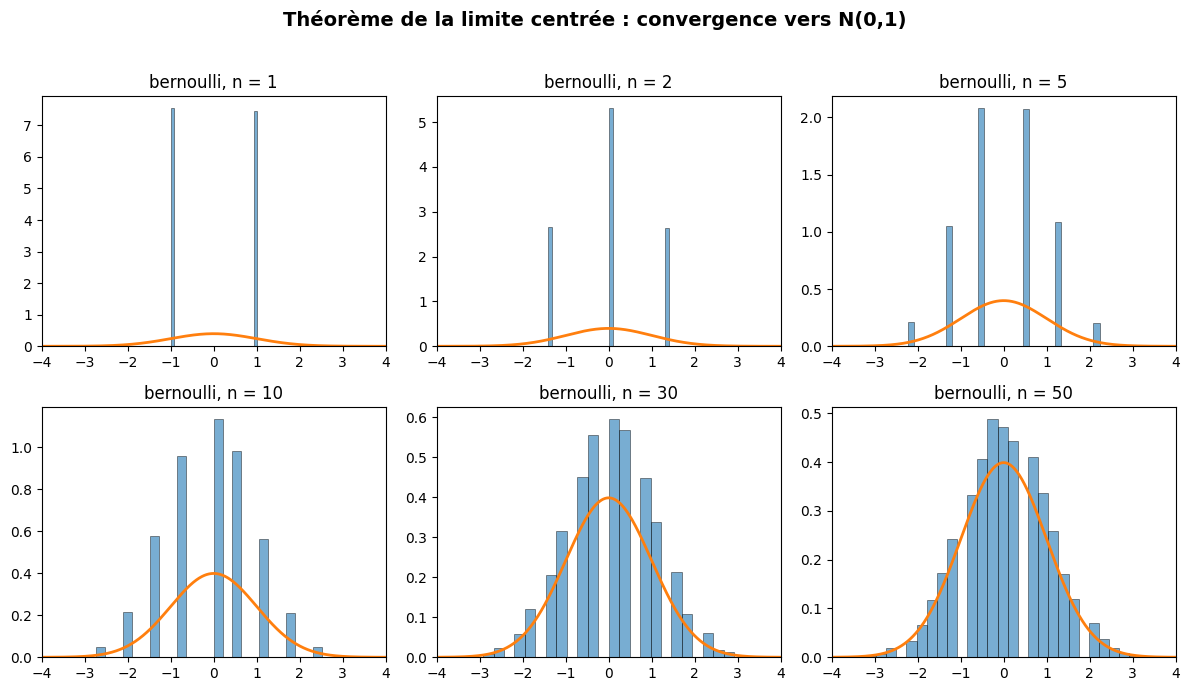

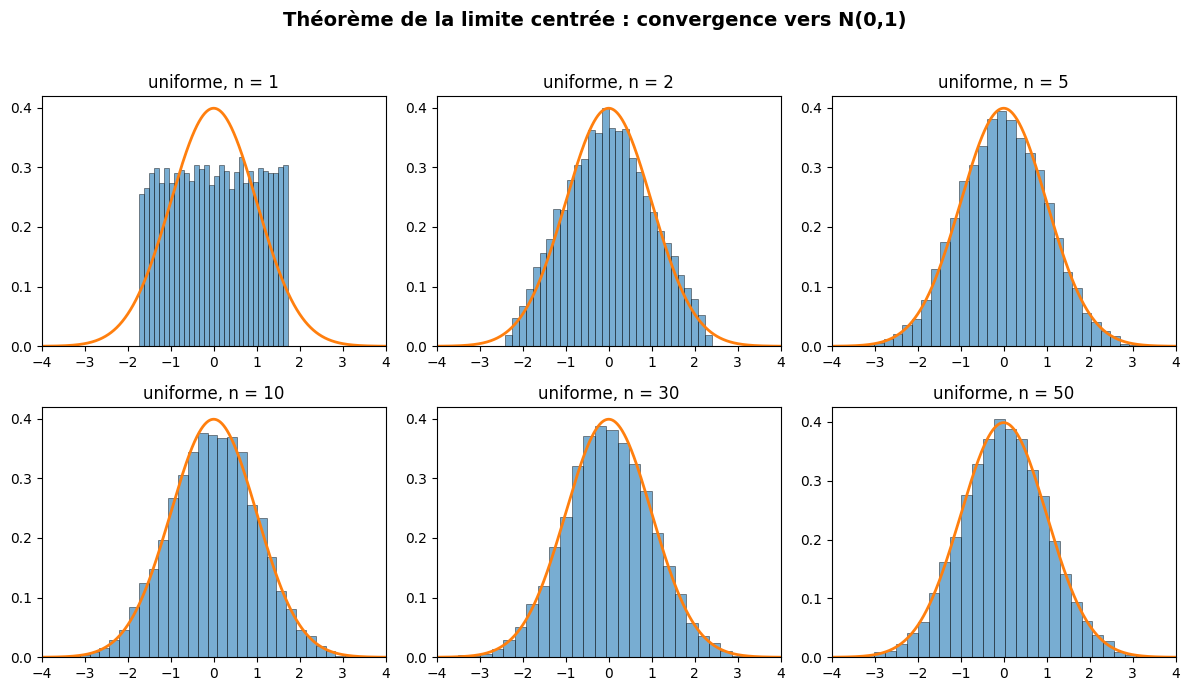

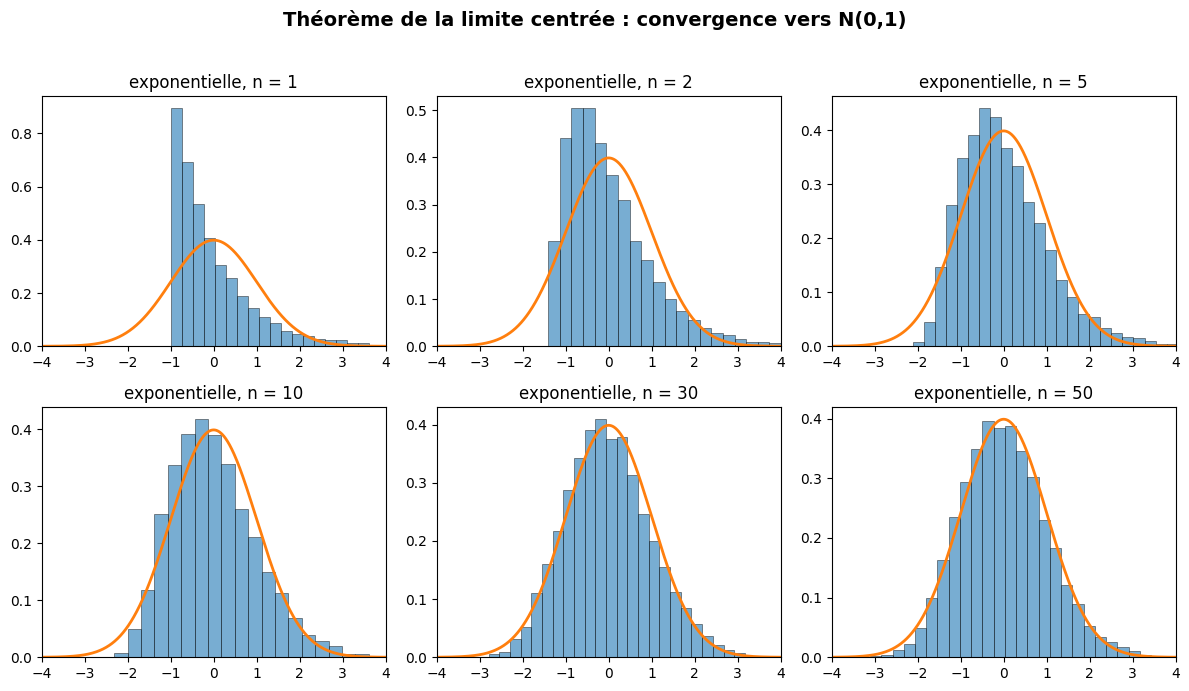

In [33]:
# TCL avec une Bernoulli(0.5)
tcl_illustration(distribution="bernoulli", n_list=(1, 2, 5, 10, 30, 50))

# TCL avec une uniforme(0,1)
tcl_illustration(distribution="uniforme", n_list=(1, 2, 5, 10, 30, 50))

# TCL avec une exponentielle(1)
tcl_illustration(distribution="exponentielle", n_list=(1, 2, 5, 10, 30, 50))

## <span id="conclusion" style="color:#1F618D;">Conclusion</span>

Ce travail met en évidence les grands résultats de convergence des probabilités :

- La **loi de Poisson** apparaît comme une limite de la **loi binomiale** lorsque les événements sont rares mais nombreux.  
- La **loi normale** peut être considérée comme une approximation de la **loi de Poisson** lorsque λ devient grand.  
- Enfin, le **théorème central limite** explique la tendance universelle à la normalité des sommes de variables aléatoires indépendantes.

Ces résultats illustrent la cohérence et la puissance unificatrice de la théorie des probabilités :
des modèles discrets ou hétérogènes tendent vers une même forme universelle — la loi normale — dès que le nombre d’observations augmente.
